# Bars Average for all Block

In this document, we create simple county-wide average ethncity data for 2011 and 2019. This will serve as our control/comparison for final esitmates.

In [120]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import matplotlib as mpl
import plotly.graph_objects as go
import kaleido

import pandas as pd

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt
# for basemaps
import contextily as ctx

import folium
from folium.plugins import MarkerCluster
import pandas as pd

import plotly.express as px

import plotly.graph_objects as go
import plotly.io as pio

# this helps us get the theme settings
import plotly.io as plt_io

# this is for simple plotting with plotly express
import plotly.express as px

# create our custom_dark theme from the plotly_dark template
plt_io.templates["custom_dark"] = plt_io.templates["plotly_dark"]

# set the paper_bgcolor and the plot_bgcolor to a new color
plt_io.templates["custom_dark"]['layout']['paper_bgcolor'] = '#30404D'
plt_io.templates["custom_dark"]['layout']['plot_bgcolor'] = '#30404D'

# you may also want to change gridline colors if you are modifying background
plt_io.templates['custom_dark']['layout']['yaxis']['gridcolor'] = '#4f687d'
plt_io.templates['custom_dark']['layout']['xaxis']['gridcolor'] = '#4f687d'



In [26]:
#!pip install -U kaleido

In [27]:
ethnala=gpd.read_file('ethnicityindex.geojson')
stations=gpd.read_file("stations.geojson")
stationarea=gpd.read_file("stationarea.geojson")

/tmp/ipykernel_54/2712614560.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

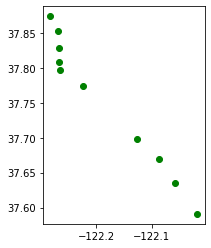

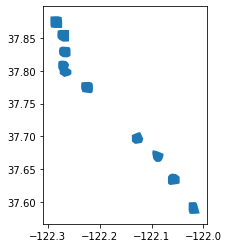

In [32]:
from shapely import wkt
stations=pd.read_csv('final_stations_walk.csv')

stationbounds=stations[['Station',
 'City',
 'Code',
 'TOD',
 'County',
 'Marker',
 'buffer_polygon']]


df=stationbounds
df['geometry'] = df['buffer_polygon'].apply(wkt.loads)
stationarea_gdf = gpd.GeoDataFrame(df,crs='epsg:4326')
#gdf = gpd.GeoDataFrame(df, crs='epsg:26910')


df2=stations
df2['geometry'] = df2['geometry'].apply(wkt.loads)
station_gdf = gpd.GeoDataFrame(df2,crs='epsg:4326')

station_gdf.plot(color='green')
stationarea_gdf.plot()

<AxesSubplot:>

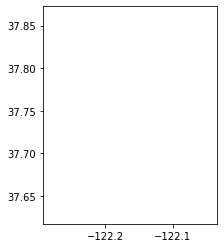

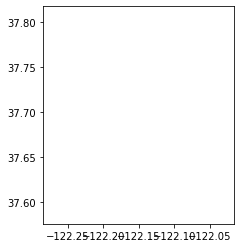

In [49]:
tod_st_area_ethn_intersect.plot(color='green')
non_tod_st_area_ethn_intersect.plot(color='red')


In [50]:
st_area_ethn_intersect = gpd.overlay(stationarea_gdf, ethnala, how='intersection')

tod_st_area_ethn_intersect=st_area_ethn_intersect[st_area_ethn_intersect['TOD']=='Yes']
non_tod_st_area_ethn_intersect=st_area_ethn_intersect[st_area_ethn_intersect['TOD']=='No']

In [33]:
ethnala

,GEOID_2019,NAME_2019,Total_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,Non Hispanic Two or more races_2019,...,Percent Non Hispanic Asian_2019,Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Percent Non Hispanic Some other race_2019,Percent Non Hispanic Two or more races_2019,Percent Hispanic_2019,perc_2019_sq,iqv_2019,perc_2013_sq,iqv_2013,geometry
0,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,2317.0,107.0,0.0,391.0,0.0,0.0,187.0,...,1.253205e+01,1.000000e-08,1.000000e-08,5.993590e+00,3.782051,5734.007232,0.487542,4553.276735,0.622483,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,15000US060014002001,"Block Group 1, Alameda, CA",990.0,761.0,13.0,4.0,41.0,0.0,0.0,75.0,...,4.141414e+00,1.000000e-08,1.000000e-08,7.575758e+00,9.696970,6079.257219,0.448085,5327.561406,0.533993,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
2,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,714.0,39.0,0.0,130.0,0.0,0.0,56.0,...,1.278269e+01,1.000000e-08,1.000000e-08,5.506391e+00,7.669617,5196.197581,0.549006,5153.442606,0.553892,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,735.0,0.0,0.0,274.0,0.0,0.0,50.0,...,2.416226e+01,1.000000e-08,1.000000e-08,4.409171e+00,6.613757,4847.957473,0.588805,4381.674737,0.642094,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
4,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,1008.0,18.0,0.0,113.0,0.0,0.0,0.0,...,9.135004e+00,1.000000e-08,1.000000e-08,1.000000e-08,7.922393,6788.537737,0.367024,4340.201217,0.646834,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,15000US060014517042,"Block Group 2, Alameda, CA",2498.0,1980.0,0.0,0.0,219.0,40.0,0.0,34.0,...,8.767014e+00,1.601281e+00,1.000000e-08,1.361089e+00,9.007206,6445.095228,0.406275,6554.716607,0.393747,"MULTIPOLYGON (((-121.79844 37.66084, -121.7984..."
1042,15000US060014517043,"Block Group 3, Alameda, CA",807.0,479.0,17.0,10.0,47.0,0.0,0.0,109.0,...,5.824040e+00,1.000000e-08,1.000000e-08,1.350682e+01,17.967782,4068.259606,0.677913,4560.514000,0.621656,"MULTIPOLYGON (((-121.78511 37.66709, -121.7844..."
1043,15000US060019819001,"Block Group 1, Alameda, CA",58.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,13.793103,7621.878716,0.271785,10000.000000,0.000000,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
1044,15000US060019820001,"Block Group 1, Alameda, CA",63.0,10.0,23.0,2.0,20.0,0.0,0.0,0.0,...,3.174603e+01,1.000000e-08,1.000000e-08,1.000000e-08,12.698413,2763.920383,0.826981,4133.333333,0.670476,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135..."


In [46]:
st_area_ethn_intersect.columns

Index(['Station', 'City', 'Code', 'TOD', 'County', 'Marker', 'buffer_polygon',
       'GEOID_2019', 'NAME_2019', 'Total_2019', 'Non Hispanic White_2019',
       'Non Hispanic Black_2019',
       'Non Hispanic American Indian and Alaska Native_2019',
       'Non Hispanic Asian_2019',
       'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
       'Non Hispanic Some other race_2019',
       'Non Hispanic Two or more races_2019', 'Hispanic_2019', 'new_GEOID',
       'Total_2013', 'Non Hispanic White_2013', 'Non Hispanic Black_2013',
       'Non Hispanic American Indian and Alaska Native_2013',
       'Non Hispanic Asian_2013',
       'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
       'Non Hispanic Some other race_2013',
       'Non Hispanic Two or more races_2013', 'Hispanic_2013', 'GEOID_2013',
       'NAME_2013', 'Percent Total_2013', 'Percent Non Hispanic White_2013',
       'Percent Non Hispanic Black_2013',
       'Percent Non Hispanic American India

In [61]:
import pandas as pd
import geopandas as gpd
import folium
import branca.colormap as cm

gdf=st_area_ethn_intersect
gdf2=station_gdf

x_map=gdf.centroid.x.mean()
y_map=gdf.centroid.y.mean()

mymap = folium.Map(location=[y_map, x_map], zoom_start=11,tiles=None)
folium.TileLayer('cartodbdark_matter',control=False).add_to(mymap)



style_function = lambda x: {'fillColor':'Red' if x['properties']['TOD']=='No' else 'Green',
                            'color':'#000000', 
                            'fillOpacity': 0.5, 
                            'weight': 0.1}

highlight_function = lambda x: {'fillColor':'Red' if x['properties']['TOD']=='No' else 'Green',
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    gdf2,
    style_function=style_function, 
    control=True,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Station', 'City', 'TOD', 'County'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)

NIL2 = folium.features.GeoJson(
    gdf,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Station', 'City', 'NAME_2019', 'TOD', 'County','iqv_2013','iqv_2019'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;'fillColor': 'orange'") 
    )
)

mymap.add_child(NIL)
mymap.add_child(NIL2)

mymap.keep_in_front(NIL)

folium.TileLayer('cartodbdark_matter').add_to(mymap)
folium.TileLayer('cartodbpositron').add_to(mymap)
folium.TileLayer('stamentoner').add_to(mymap)

folium.LayerControl().add_to(mymap)

mymap.save('block_station_buffer.html')
mymap

/tmp/ipykernel_54/819987063.py:9: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_54/819987063.py:10: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [28]:
tod=stations[stations['TOD']=='Yes']
ntod=stations[stations['TOD']=='No']

In [31]:
stations

,Station,City,Code,TOD,County,Marker,geometry
0,ASHBY,Berkeley,BKY,Yes,ALA,D,POINT (-122.27012 37.85321)
1,MACARTHUR,Oakland,OAK,Yes,ALA,D,POINT (-122.26712 37.82871)
2,HAYWARD,Hayward,HAY,Yes,ALA,D,POINT (-122.08720 37.67012)
3,SOUTH HAYWARD,Hayward,HAY,Yes,ALA,D,POINT (-122.05704 37.63448)
4,FRUITVALE,Oakland,OAK,Yes,ALA,D,POINT (-122.22420 37.77456)
5,NORTH BERKELEY,Berkeley,BKY,No,ALA,o,POINT (-122.28335 37.87406)
6,19TH STREET/OAKLAND,Oakland,OAK,No,ALA,o,POINT (-122.26839 37.80808)
7,BAY FAIR,San Leandro,SAN,No,ALA,o,POINT (-122.12706 37.69757)
8,UNION CITY,Union City,UNC,No,ALA,o,POINT (-122.01715 37.59087)
9,LAKE MERRITT,Oakland,OAK,No,ALA,o,POINT (-122.26554 37.79768)


Creating 

In [ ]:
st_area_ethn_intersect = gpd.overlay(stationarea_gdf, ethnala, how='intersection')

tod_st_area_ethn_intersect=st_area_ethn_intersect[st_area_ethn_intersect['TOD']=='Yes']
non_tod_st_area_ethn_intersect=st_area_ethn_intersect[st_area_ethn_intersect['TOD']=='No']

In [90]:
buffer_b2019=st_area_ethn_intersect[['Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019']]
buffer_b2013=st_area_ethn_intersect[['Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013']]


buffer_b2019av=avblocks(buffer_b2019, 'Value 2019')
buffer_b2019av.head()


buffer_b2013av=avblocks(buffer_b2013, 'Value 2013')
buffer_b2013av.head()

buffer_blockabsolute=buffer_b2013av.merge(buffer_b2019av, on='Ethnicity')
buffer_blockabsolute

,Value 2013,Ethnicity,Value 2019
0,385.753769,Non Hispanic White,435.296482
1,215.412060,Non Hispanic Black,213.859296
2,4.045226,Non Hispanic American Indian and Alaska Native,6.155779
3,319.517588,Non Hispanic Asian,368.010050
4,13.708543,Non Hispanic Native Hawaiian and Other Pacific...,9.432161
5,3.341709,Non Hispanic Some other race,5.336683
6,54.929648,Non Hispanic Two or more races,76.095477
7,360.939698,Hispanic,381.839196


In [72]:
buffer_blockabsolute

,Value 2013,Ethnicity,Value 2019,Percentage_Change
0,385.753769,Black,435.296482,12.843093
1,215.412060,White,213.859296,-0.720834
2,4.045226,Hispanic,6.155779,52.173913
3,319.517588,NH/PI,368.010050,15.176774
4,13.708543,AI/AN,9.432161,-31.195015
5,3.341709,Other races,5.336683,59.699248
6,54.929648,Two or more races,76.095477,38.532614
7,360.939698,Asian,381.839196,5.790302


In [91]:
buffer_blockabsolute['Ethnicity']=['White','Black','AI/AN','Asian','NH/PI','Other races','Two or more races','Hispanic']

buffer_blockabsolute['Percentage_Change']=(buffer_blockabsolute['Value 2019']-buffer_blockabsolute['Value 2013'])/buffer_blockabsolute['Value 2013']*100

buffer_blockabsolute.columns=['Year 2013', 'Ethnicity', 'Year 2019', 'Change']


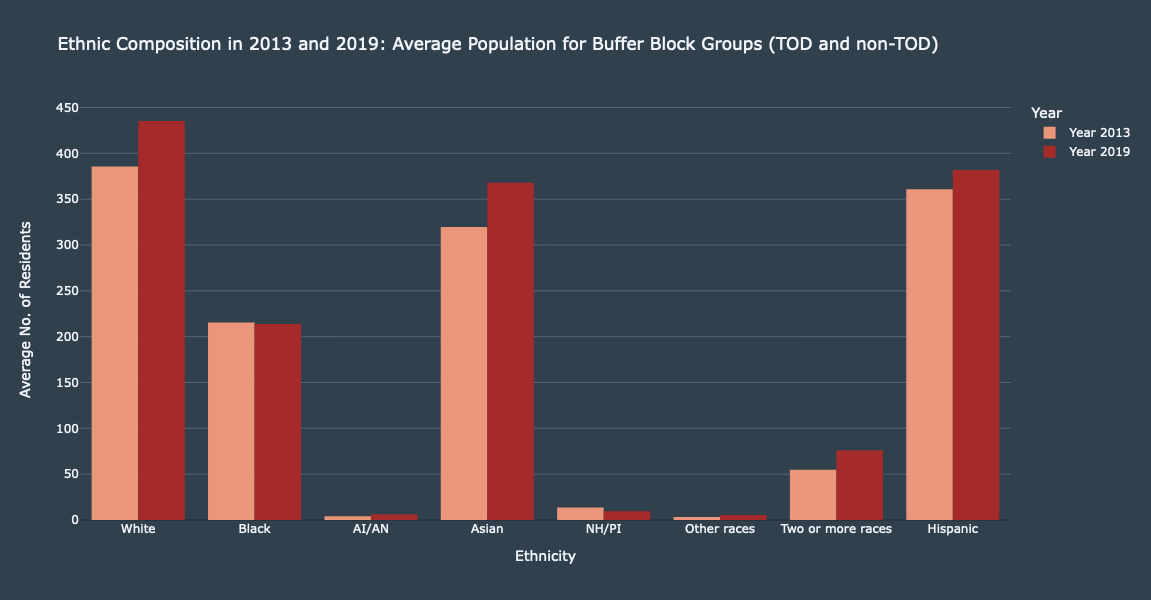

In [128]:

# a simple bar chart, putting date on the x-axis

fig = px.bar(buffer_blockabsolute,
             x='Ethnicity',
             y=['Year 2013', 'Year 2019'],
             barmode='group',
             height=600,
             title="Ethnic Composition in 2013 and 2019: Average Population for Buffer Block Groups (TOD and non-TOD)",
             color_discrete_sequence=["#e9967a","#a52a2a"],
             labels={'Ethnicity':'Ethnicity','value':'Average No. of Residents', 'variable':'Year'}
                     )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)
fig.layout.template = 'custom_dark'

fig.write_html('htmls/buffer_block_average_absolute.html')

# show the figure
fig.show()

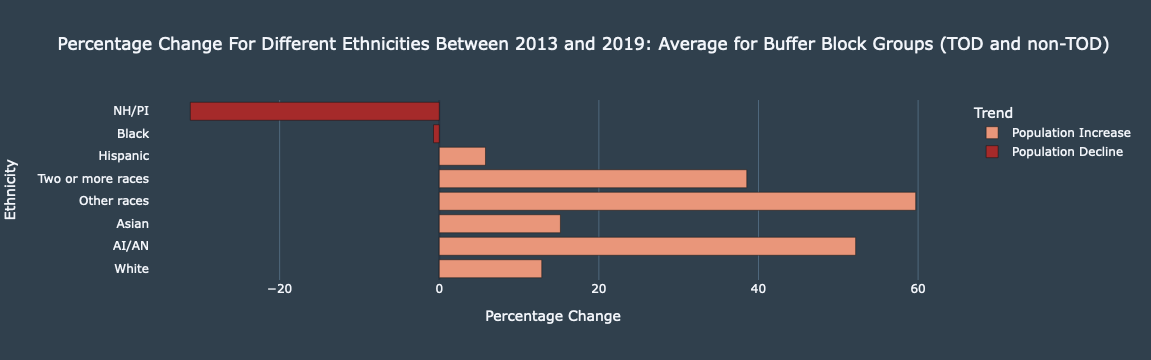

In [127]:
buffer_blockabsolute["Trend"] = np.where(buffer_blockabsolute["Change"]<0, 'Population Decline','Population Increase')
fig = px.bar(buffer_blockabsolute, 
             y=buffer_blockabsolute['Ethnicity'], 
             x=buffer_blockabsolute['Change'],
             title="Percentage Change For Different Ethnicities Between 2013 and 2019: Average for Buffer Block Groups (TOD and non-TOD)",
             orientation='h',
             color=buffer_blockabsolute['Trend'],
             color_discrete_sequence=["#e9967a","#a52a2a"],
             labels={'Ethnicity':'Ethnicity',
                    'Change':'Percentage Change'}
            )
fig.layout.template = 'custom_dark'

fig.write_html('htmls/buffer_block_average_percentage.html')
fig.show()
# brown 

In [95]:
b2019=ethnala[['Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019']]
b2013=ethnala[['Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013']]


def avblocks(block, x):
    averageblock=block.mean(axis=0, numeric_only=True)
    averageblock=averageblock.to_frame().rename(columns={0:x})
    county=['Non Hispanic White',
            'Non Hispanic Black', 
            'Non Hispanic American Indian and Alaska Native',
            'Non Hispanic Asian',
            'Non Hispanic Native Hawaiian and Other Pacific Islander',
            'Non Hispanic Some other race',
            'Non Hispanic Two or more races',
            'Hispanic']
    averageblock['Ethnicity']=county
   # averageblock=averageblock.transpose()
    return (averageblock)

In [96]:
b2019av=avblocks(b2019, 'Value 2019')
b2019av.head()

,Value 2019,Ethnicity
Non Hispanic White_2019,497.559273,Non Hispanic White
Non Hispanic Black_2019,163.640535,Non Hispanic Black
Non Hispanic American Indian and Alaska Native_2019,4.980880,Non Hispanic American Indian and Alaska Native
Non Hispanic Asian_2019,474.193117,Non Hispanic Asian
Non Hispanic Native Hawaiian and Other Pacific Islander_2019,12.693117,Non Hispanic Native Hawaiian and Other Pacific...


In [97]:
b2013av=avblocks(b2013,'Value 2013')
b2013av

,Value 2013,Ethnicity
Non Hispanic White_2013,494.994264,Non Hispanic White
Non Hispanic Black_2013,173.341300,Non Hispanic Black
Non Hispanic American Indian and Alaska Native_2013,4.286807,Non Hispanic American Indian and Alaska Native
Non Hispanic Asian_2013,390.588910,Non Hispanic Asian
Non Hispanic Native Hawaiian and Other Pacific Islander_2013,11.692161,Non Hispanic Native Hawaiian and Other Pacific...
Non Hispanic Some other race_2013,4.205545,Non Hispanic Some other race
Non Hispanic Two or more races_2013,57.985660,Non Hispanic Two or more races
Hispanic_2013,330.637667,Hispanic


In [98]:
blockabsolute=b2013av.merge(b2019av, on='Ethnicity')
blockabsolute

,Value 2013,Ethnicity,Value 2019
0,494.994264,Non Hispanic White,497.559273
1,173.341300,Non Hispanic Black,163.640535
2,4.286807,Non Hispanic American Indian and Alaska Native,4.980880
3,390.588910,Non Hispanic Asian,474.193117
4,11.692161,Non Hispanic Native Hawaiian and Other Pacific...,12.693117
5,4.205545,Non Hispanic Some other race,5.169216
6,57.985660,Non Hispanic Two or more races,70.956023
7,330.637667,Hispanic,354.702677


In [99]:
blockabsolute['Percentage_Change']=(blockabsolute['Value 2019']-blockabsolute['Value 2013'])/blockabsolute['Value 2013']*100

In [9]:
blockabsolute['Ethnicity'].to_list()

['Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic']

In [11]:
blockabsolute.columns=['Year 2013', 'Ethnicity', 'Year 2019', 'Change']

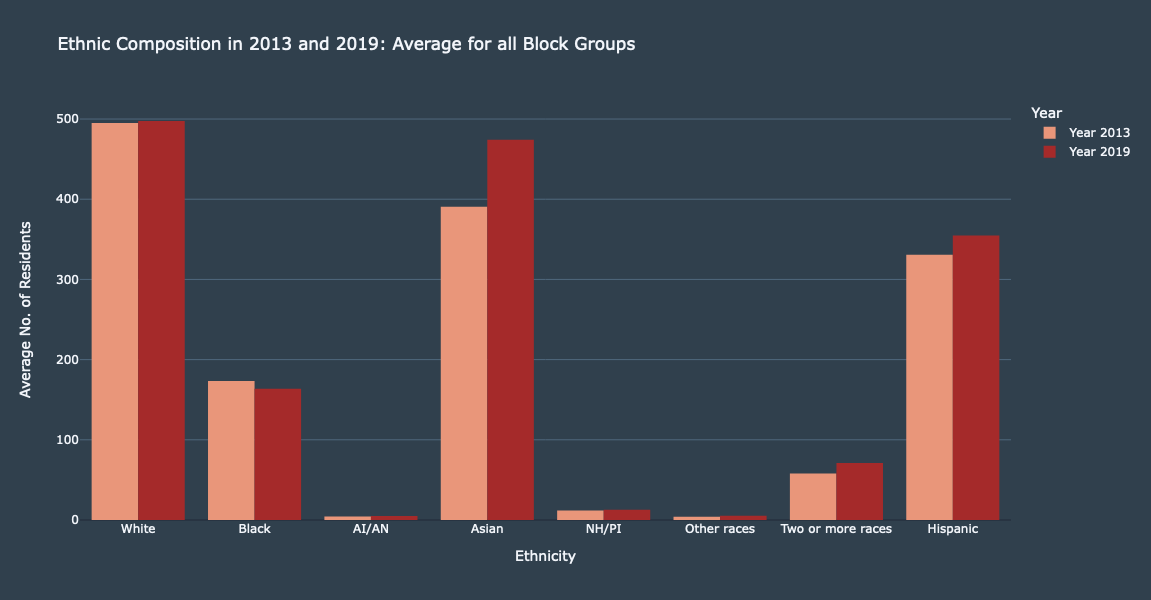

In [125]:
# a simple bar chart, putting date on the x-axis

fig = px.bar(blockabsolute,
             x='Ethnicity',
             y=['Year 2013', 'Year 2019'],
             barmode='group',
             height=600,
             title="Ethnic Composition in 2013 and 2019: Average for all Block Groups",
             color_discrete_sequence=["#e9967a","#a52a2a"],
             labels={'Ethnicity':'Ethnicity','value':'Average No. of Residents', 'variable':'Year'}
                     )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)
fig.layout.template = 'custom_dark'

fig.write_html('htmls/block_average_absolute.html')

# show the figure
fig.show()

In [23]:
fig.write_html('htmls/block_average_absolute.html')

In [ ]:
'''
import base64
from io import BytesIO
tmpfile = BytesIO()
#fig.write_image(file=tmpfile, format='.png')
#encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

with open('htmls/block_average_absolute.html','w') as f:
    f.write(html)
#fig.write_image(file="htmls/block_average_absolute.png", format='.png',dpi=100, bbox_inches='tight')
plt.show()
'''

In [34]:
fig, ax=plt.figsize=(10,10)
ax.bar(blockabsolute['Year 2013'],blockabsolute.['Ethnicity'], width=0.35, yerr-

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()

       
# variables
labels = ['NA', 'EU', 'JP', 'Others']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
title = 'Video Game Sales By Platform and Region\n'
subtitle = 'Proportion of Games Sold by Region'
def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(df_filter, labels, colors, title, subtitle)

SyntaxError: invalid syntax (901803081.py, line 2)

In [35]:
df = px.data.blockabsolute()
fig = px.bar(df, x="total_bill", y="day", orientation='h')
fig.show()

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

AttributeError: module 'plotly.express.data' has no attribute 'blockabsolute'

In [78]:
blockabsolute

,Year 2013,Ethnicity,Year 2019,Change,Trend
0,494.994264,Black,497.559273,0.518190,Population Increase
1,173.341300,White,163.640535,-5.596338,Population Decline
2,4.286807,Hispanic,4.980880,16.190901,Population Increase
3,390.588910,NH/PI,474.193117,21.404654,Population Increase
4,11.692161,AI/AN,12.693117,8.560916,Population Increase
5,4.205545,Other races,5.169216,22.914299,Population Increase
6,57.985660,Two or more races,70.956023,22.368226,Population Increase
7,330.637667,Asian,354.702677,7.278363,Population Increase


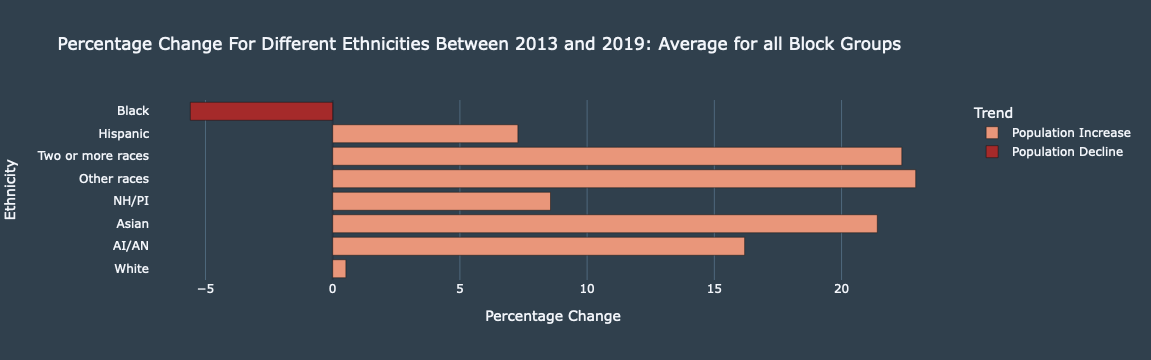

In [124]:
blockabsolute["Trend"] = np.where(blockabsolute["Change"]<0, 'Population Decline','Population Increase')
fig = px.bar(blockabsolute, 
             y=blockabsolute['Ethnicity'], 
             x=blockabsolute['Change'],
             title="Percentage Change For Different Ethnicities Between 2013 and 2019: Average for all Block Groups",
             orientation='h',
             color=blockabsolute['Trend'],
             color_discrete_sequence=["#e9967a","#a52a2a"],
             labels={'Ethnicity':'Ethnicity',
                    'Change':'Percentage Change'}
            )
fig.layout.template = 'custom_dark'

fig.write_html('htmls/block_average_percentage.html')
fig.show()
# brown 

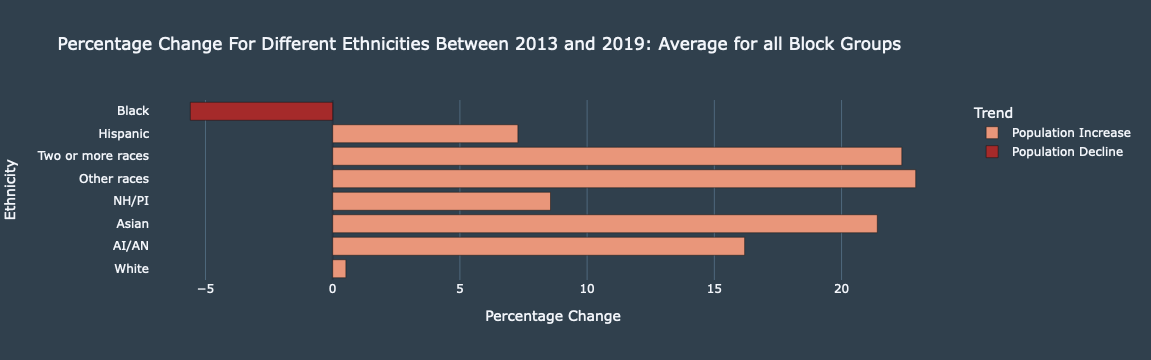

In [123]:
blockabsolute["Trend"] = np.where(blockabsolute["Change"]<0, 'Population Decline','Population Increase')
fig = px.bar(blockabsolute, 
             y=blockabsolute['Ethnicity'], 
             x=blockabsolute['Change'],
             title="Percentage Change For Different Ethnicities Between 2013 and 2019: Average for all Block Groups",
             orientation='h',
             color=blockabsolute['Trend'],
             color_discrete_sequence=["#e9967a","#a52a2a"],
             labels={'Ethnicity':'Ethnicity',
                    'Change':'Percentage Change'}
            )

fig.layout.template = 'custom_dark'

fig.write_html('htmls/block_average_percentage.html')
fig.show()
# brown 

In [84]:
tod_buffer_b2019=tod_st_area_ethn_intersect[['Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019']]
buffer_b2013=tod_st_area_ethn_intersect[['Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013']]


tod_buffer_b2019av=avblocks(tod_buffer_b2019, 'Value 2019')
tod_buffer_b2019av.head()


buffer_b2013av=avblocks(buffer_b2013, 'Value 2013')
buffer_b2013av.head()

tod_buffer_blockabsolute=buffer_b2013av.merge(tod_buffer_b2019av, on='Ethnicity')
tod_buffer_blockabsolute


,Value 2013,Ethnicity,Value 2019
0,363.884615,Non Hispanic White,421.971154
1,232.413462,Non Hispanic Black,219.336538
2,2.855769,Non Hispanic American Indian and Alaska Native,5.750000
3,212.846154,Non Hispanic Asian,260.067308
4,20.221154,Non Hispanic Native Hawaiian and Other Pacific...,12.394231
5,2.769231,Non Hispanic Some other race,6.730769
6,51.778846,Non Hispanic Two or more races,78.548077
7,454.240385,Hispanic,472.990385


In [86]:
list(tod_buffer_blockabsolute['Ethnicity'])

['Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic']

In [87]:
tod_buffer_blockabsolute['Ethnicity']=['White','Black','AI/AN','Asian','NH/PI','Other races','Two or more races','Hispanic']



tod_buffer_blockabsolute['Percentage_Change']=(tod_buffer_blockabsolute['Value 2019']-tod_buffer_blockabsolute['Value 2013'])/tod_buffer_blockabsolute['Value 2013']*100

tod_buffer_blockabsolute.columns=['Year 2013', 'Ethnicity', 'Year 2019', 'Change']


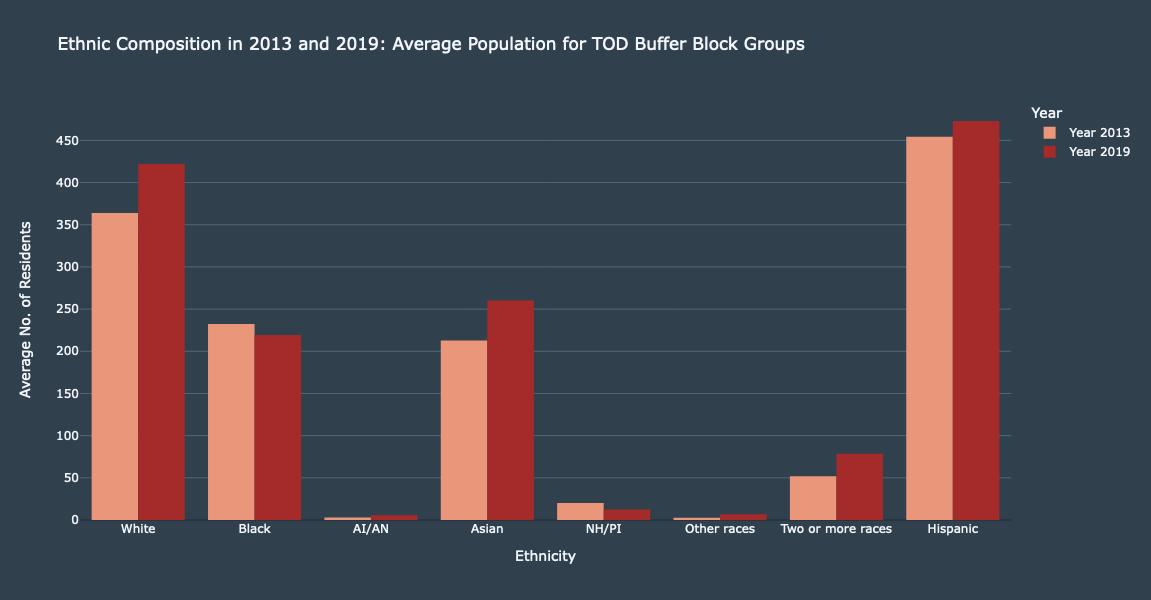

In [122]:
# a simple bar chart, putting date on the x-axis

fig = px.bar(tod_buffer_blockabsolute,
             x='Ethnicity',
             y=['Year 2013', 'Year 2019'],
             barmode='group',
             height=600,
             title="Ethnic Composition in 2013 and 2019: Average Population for TOD Buffer Block Groups",
             color_discrete_sequence=["#e9967a","#a52a2a"],
             labels={'Ethnicity':'Ethnicity','value':'Average No. of Residents', 'variable':'Year'}
                     )

fig.layout.template = 'custom_dark'


# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

fig.write_html('htmls/tod_buffer_block_average_absolute.html')

# show the figure
fig.show()


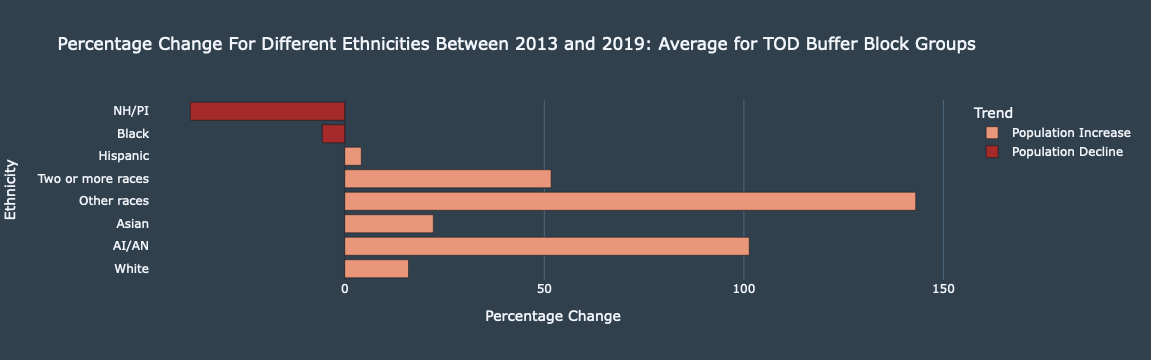

In [121]:
tod_buffer_blockabsolute["Trend"] = np.where(tod_buffer_blockabsolute["Change"]<0, 'Population Decline','Population Increase')
fig = px.bar(tod_buffer_blockabsolute, 
             y=tod_buffer_blockabsolute['Ethnicity'], 
             x=tod_buffer_blockabsolute['Change'],
             title="Percentage Change For Different Ethnicities Between 2013 and 2019: Average for TOD Buffer Block Groups",
             orientation='h',
             color=tod_buffer_blockabsolute['Trend'],
             color_discrete_sequence=["#e9967a","#a52a2a"],
             labels={'Ethnicity':'Ethnicity',
                    'Change':'Percentage Change'}
            )

fig.layout.template = 'custom_dark'

fig.write_html('htmls/tod_buffer_block_average_percentage.html')
fig.show()
# brown 


In [109]:
non_tod_buffer_b2019=non_tod_st_area_ethn_intersect[['Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019']]
buffer_b2013=non_tod_st_area_ethn_intersect[['Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013']]


non_tod_buffer_b2019av=avblocks(non_tod_buffer_b2019, 'Value 2019')
non_tod_buffer_b2019av.head()


buffer_b2013av=avblocks(buffer_b2013, 'Value 2013')
buffer_b2013av.head()

non_tod_buffer_blockabsolute=buffer_b2013av.merge(non_tod_buffer_b2019av, on='Ethnicity')
non_tod_buffer_blockabsolute


,Value 2013,Ethnicity,Value 2019
0,409.694737,Non Hispanic White,449.884211
1,196.800000,Non Hispanic Black,207.863158
2,5.347368,Non Hispanic American Indian and Alaska Native,6.600000
3,436.294737,Non Hispanic Asian,486.178947
4,6.578947,Non Hispanic Native Hawaiian and Other Pacific...,6.189474
5,3.968421,Non Hispanic Some other race,3.810526
6,58.378947,Non Hispanic Two or more races,73.410526
7,258.800000,Hispanic,282.052632


In [110]:
non_tod_buffer_blockabsolute['Ethnicity']=['White','Black','AI/AN','Asian','NH/PI','Other races','Two or more races','Hispanic']

non_tod_buffer_blockabsolute['Percentage_Change']=(non_tod_buffer_blockabsolute['Value 2019']-non_tod_buffer_blockabsolute['Value 2013'])/non_tod_buffer_blockabsolute['Value 2013']*100

non_tod_buffer_blockabsolute.columns=['Year 2013', 'Ethnicity', 'Year 2019', 'Change']




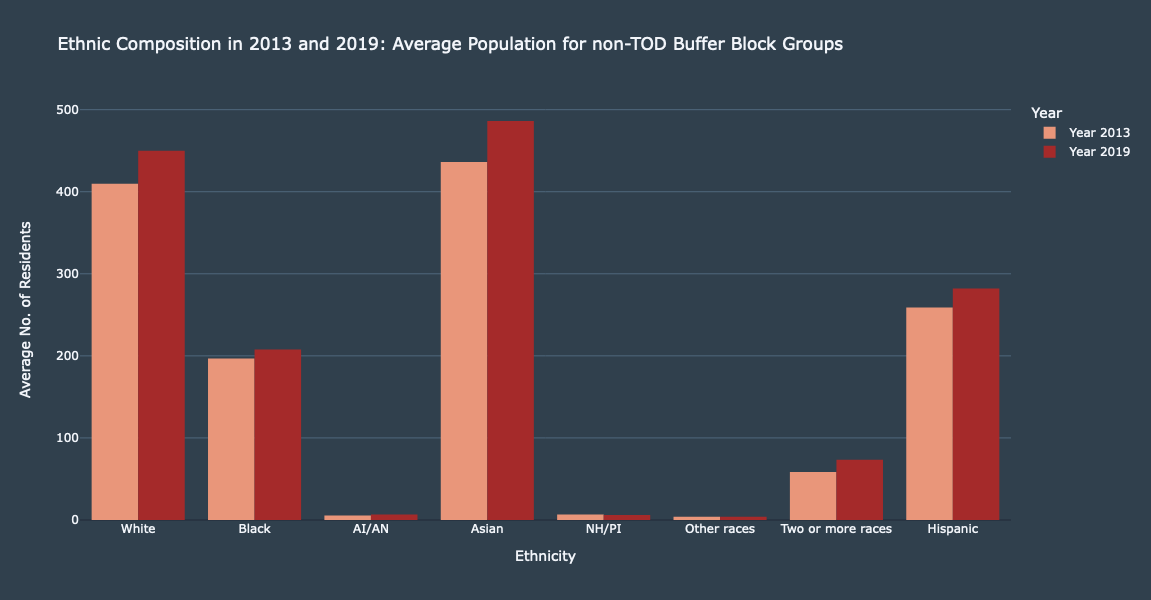

In [129]:
# a simple bar chart, putting date on the x-axis

fig = px.bar(non_tod_buffer_blockabsolute,
             x='Ethnicity',
             y=['Year 2013', 'Year 2019'],
             barmode='group',
             height=600,
             title="Ethnic Composition in 2013 and 2019: Average Population for non-TOD Buffer Block Groups",
             color_discrete_sequence=["#e9967a","#a52a2a"],
             labels={'Ethnicity':'Ethnicity','value':'Average No. of Residents', 'variable':'Year'}
                     )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)
fig.layout.template = 'custom_dark'

fig.write_html('htmls/non_tod_buffer_block_average_absolute.html')

# show the figure
fig.show()


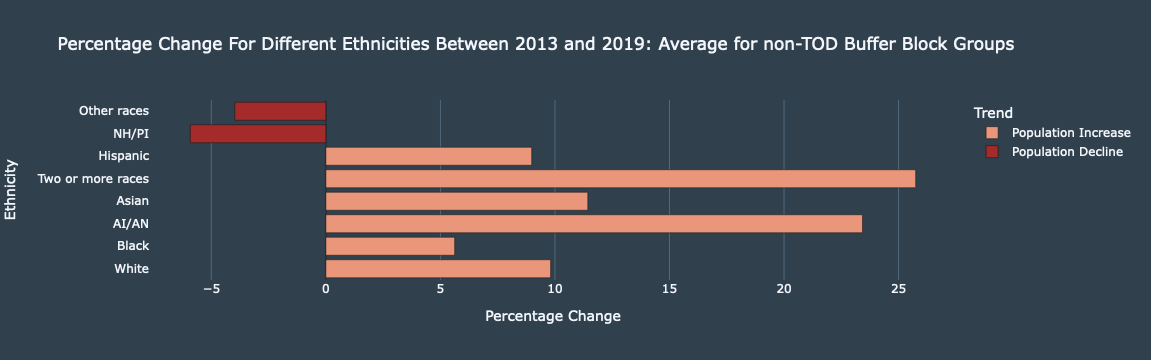

In [130]:
non_tod_buffer_blockabsolute["Trend"] = np.where(non_tod_buffer_blockabsolute["Change"]<0, 'Population Decline','Population Increase')
fig = px.bar(non_tod_buffer_blockabsolute, 
             y=non_tod_buffer_blockabsolute['Ethnicity'], 
             x=non_tod_buffer_blockabsolute['Change'],
             title="Percentage Change For Different Ethnicities Between 2013 and 2019: Average for non-TOD Buffer Block Groups",
             orientation='h',
             color=non_tod_buffer_blockabsolute['Trend'],
             color_discrete_sequence=["#e9967a","#a52a2a"],
             labels={'Ethnicity':'Ethnicity',
                    'Change':'Percentage Change'}
            )
fig.layout.template = 'custom_dark'

fig.write_html('htmls/non_tod_buffer_block_average_percentage.html')
fig.show()
# brown 


In [19]:
iqv=ethnala[['iqv_2013_sq','iqv_2019_sq',]]
iqv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iqv_2013_sq  7405 non-null   float64
 1   iqv_2019_sq  7389 non-null   float64
dtypes: float64(2)
memory usage: 116.3 KB


In [20]:
iqv_average=iqv.mean(axis=0, numeric_only=True)
iqv_average=iqv_average.to_frame().rename(columns={0:'Diversity Index'})
iqv_average=iqv_average.transpose()
iqv_average.columns=[['Diversity Index 2013','Diversity Index 2019']]

In [21]:
iqv_average=iqv_average.transpose()
iqv_average

,Diversity Index
Diversity Index 2013,0.679786
Diversity Index 2019,0.689643


In [22]:
year=['2013','2019']
year
iqv_average['Year']=year

In [32]:
iqv_average

,Diversity Index,Year
Diversity Index 2013,0.679786,2013
Diversity Index 2019,0.689643,2019


In [41]:
iqv_average.to_csv(r"iqv_average.csv")

<Figure size 720x360 with 0 Axes>

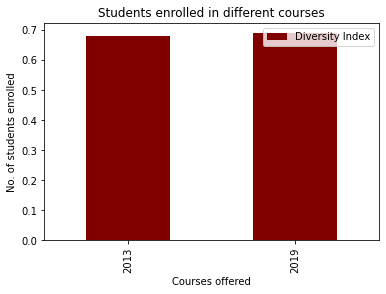

In [104]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
iqv_average.plot.bar(x='Year', y='Diversity Index', color ='maroon')
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

In [131]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

import matplotlib.pyplot as plt

import contextily as ctx
# Build the choropleth
import plotly.express as px

import base64
from io import BytesIO

from keplergl import KeplerGl

In [133]:
ethdf=gpd.read_file("ethnicityindex.geojson")
stadf=gpd.read_file("stations.geojson")

ethdf=st_area_ethn_intersect

In [134]:
tod=stadf[stadf['TOD']=='Yes']
ntod=stadf[stadf['TOD']=='No']
ethdf_wb = ethdf.to_crs(epsg=3857)
stadf_wb = stadf.to_crs(epsg=3857)
tod_wb = tod.to_crs(epsg=3857)
ntod_wb = ntod.to_crs(epsg=3857)

In [136]:
ethchange_wb=ethdf_wb[['GEOID_2019' ,'NAME_2019','iqv_2019','iqv_2013','geometry']]
ethchange_wb['index_change']=((ethchange_wb['iqv_2019']-ethchange_wb['iqv_2013'])/ethchange_wb['iqv_2013'])*100
ethchange_wb=ethchange_wb.dropna()
ethchange_wb

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GEOID_2019,NAME_2019,iqv_2019,iqv_2013,geometry,index_change
0,15000US060014004002,"Block Group 2, Alameda, CA",0.733564,0.742411,"POLYGON ((-13609824.475 4557491.623, -13610073...",-1.191694
1,15000US060014004003,"Block Group 3, Alameda, CA",0.659564,0.592527,"POLYGON ((-13609779.869 4558112.226, -13609794...",11.313721
2,15000US060014005001,"Block Group 1, Alameda, CA",0.802496,0.712622,"POLYGON ((-13610596.208 4558541.678, -13610584...",12.611833
3,15000US060014005002,"Block Group 2, Alameda, CA",0.847895,0.734783,"POLYGON ((-13610824.757 4557458.503, -13610829...",15.394023
4,15000US060014005003,"Block Group 3, Alameda, CA",0.684486,0.778466,"POLYGON ((-13610964.008 4558060.093, -13610949...",-12.072475
...,...,...,...,...,...,...
194,15000US060014053022,"Block Group 2, Alameda, CA",0.797833,0.848829,"POLYGON ((-13609287.815 4550673.866, -13609309...",-6.007723
195,15000US060014060001,"Block Group 1, Alameda, CA",0.816047,0.816346,"MULTIPOLYGON (((-13610283.623 4550019.539, -13...",-0.036548
196,15000US060014060002,"Block Group 2, Alameda, CA",0.576723,0.402946,"POLYGON ((-13609696.224 4550197.907, -13609699...",43.126430
197,15000US060014060003,"Block Group 3, Alameda, CA",0.829804,0.865854,"POLYGON ((-13609288.460 4550565.822, -13609303...",-4.163608


In [138]:
stadf=gpd.read_file("stations.geojson")

stadf['lat']=stadf['geometry'].y
stadf['lon']=stadf['geometry'].x
stadf.columns

stat_gdf=stadf[['Station', 'City', 'Code', 'TOD', 'County', 'Marker', 'lat',
       'lon','geometry']]

#Create a basemap 
map = KeplerGl(height=600, width=800)#show the map
map.add_data(data=ethchange_wb, name="Change in Ethnicity Index 2013-2019")
map.add_data(data=stat_gdf, name='BART Stations')

#map.save_to_html(file_name='test_kepler_2013.html',read_only=True)

map.save_to_html(file_name='final_buffer_kepler.html',read_only=True)
map




User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to final_buffer_kepler.html!


KeplerGl(data={'Change in Ethnicity Index 2013-2019': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…

In [141]:
config=map.config

In [142]:
stadf=gpd.read_file("stations.geojson")

stadf['lat']=stadf['geometry'].y
stadf['lon']=stadf['geometry'].x
stadf.columns

stat_gdf=stadf[['Station', 'City', 'Code', 'TOD', 'County', 'Marker', 'lat',
       'lon','geometry']]

#Create a basemap 
map = KeplerGl(height=600, width=800,config=config)#show the map
map.add_data(data=ethchange_wb, name="Change in Ethnicity Index 2013-2019")
map.add_data(data=stat_gdf, name='BART Stations')

#map.save_to_html(file_name='test_kepler_2013.html',read_only=True)

map.save_to_html(file_name='final_buffer_kepler.html',read_only=True)
map




User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to final_buffer_kepler.html!


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'vpsy092', 'type': …

In [143]:
map.config

{'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': 'vpsy092',
     'type': 'point',
     'config': {'dataId': 'BART Stations',
      'label': 'BART Stations',
      'color': [34, 63, 154],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 20.5,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Ice And Fire 3',
        'type': 'diverging',
        'category': 'Uber',
        'colors': ['#0198BD', '#FAFEB3', '#D50255']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
   